<a href="https://colab.research.google.com/github/Kittonn/intro-to-ml-and-dl/blob/main/W9_HW_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import datasets
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
# Check for CUDA
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
# Load the California housing dataset
california_housing = fetch_california_housing()
X = california_housing.data[:, :2]  # Only first two features
y = california_housing.target.reshape(-1, 1)  # Reshape for PyTorch

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)

In [ ]:
# @title เเบบลบโค้ดบางส่วนออก
# Define the model (Linear Regression)
model = nn.Sequential(
    nn.Linear(2, 1)  # 2 input features → 1 output
)

# DIY : Manual Weight initialization (Use in part 3) -----------------------------------------------------------------------

# # Manually set weights (Use In Part 3)
# with torch.no_grad():
#     model[0].weight.copy_(torch.tensor([[-2.0, -2.0]]))  # Set weights to [-2, 2]
#     model[0].bias.fill_(0.0)  # Optionally set bias to 0

# DIY : Manual Weight initialization (Use in part 3) -----------------------------------------------------------------------

# Define loss function and optimizer
criterion = nn.MSELoss()

# DIY : Choosing & Setting Optimizer -----------------------------------------------------------------------

optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9) # SGD With Momentum
# optimizer = optim.Adagrad(model.parameters(), lr=0.001) # AdaGrad
# optimizer = optim.RMSprop(model.parameters(), lr=0.01, alpha=0.9) # RMSProp
# optimizer = optim.Adam(model.parameters(), lr=0.01) # Adam

# DIY : Choosing & Setting Optimizer -----------------------------------------------------------------------


# DIY : Choosing & Setting Scheduler -----------------------------------------------------------------------

# scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.95) # Exponentialy lower learning rate
# scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.9) # Lower learning rate every step size epochs

# DIY : Choosing & Setting Scheduler -----------------------------------------------------------------------



# Track parameter updates for visualization
num_epochs = 100
loss_history = []
theta_history = []

# Training loop
for epoch in range(num_epochs):
    outputs = model(X_train)

    # DIY : Training Loop ----------------------------------------------------------------------------------------

    # loss = # Calculate Loss Here

    # Zero past gradient here
    # Backward Propagation here
    # Optimizer and Scheduler step here


    # DIY : Training Loop ----------------------------------------------------------------------------------------

    # Store parameters for visualization
    theta = list(model.parameters())[0].detach().numpy().flatten()  # Get weight values
    theta_history.append(theta)
    loss_history.append(loss.item())

    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.6f}")

# Convert to NumPy arrays
theta_history = np.array(theta_history)

# Generate Contour Plot --------------------------------------------------------------------------------------
theta1_vals = np.linspace(-2, 2, 100)
theta2_vals = np.linspace(-2, 2, 100)
T1, T2 = np.meshgrid(theta1_vals, theta2_vals)

# Compute the loss for each (θ1, θ2)
Z = np.zeros_like(T1)
for i in range(T1.shape[0]):
    for j in range(T1.shape[1]):
        test_theta = torch.tensor([[T1[i, j]], [T2[i, j]]], dtype=torch.float32)
        test_output = torch.matmul(torch.tensor(X_train.numpy()), test_theta)  # Forward pass
        Z[i, j] = torch.mean((test_output - y_train) ** 2).item()  # MSE loss

# Plot contour
plt.figure(figsize=(8, 6))
plt.contour(T1, T2, Z, levels=30, cmap='viridis')
plt.plot(theta_history[:, 0], theta_history[:, 1], 'ro-', markersize=5, label="Gradient Descent Path")
plt.scatter(theta_history[0, 0], theta_history[0, 1], color='blue', marker='o', label="Start")
plt.scatter(theta_history[-1, 0], theta_history[-1, 1], color='red', marker='x', label="End")
plt.xlabel("Theta 1 (Weight 1)")
plt.ylabel("Theta 2 (Weight 2)")
plt.title("Gradient Descent in Parameter Space")
plt.legend()
plt.show()

Epoch 0: Loss = 16.329748
Epoch 10: Loss = 14.080914
Epoch 20: Loss = 10.463143
Epoch 30: Loss = 7.309887
Epoch 40: Loss = 5.006013
Epoch 50: Loss = 3.445766
Epoch 60: Loss = 2.427352
Epoch 70: Loss = 1.774859
Epoch 80: Loss = 1.360696
Epoch 90: Loss = 1.098973


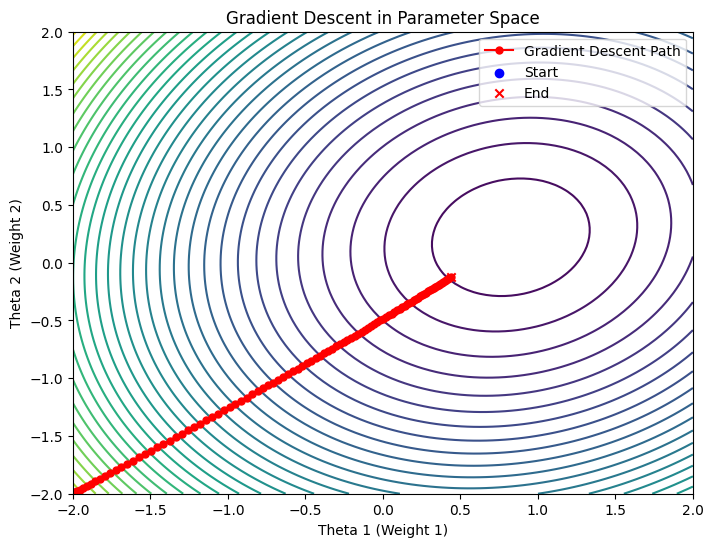

In [ ]:
# @title เเบบเต็ม
# Define the model (Linear Regression)
model = nn.Sequential(
    nn.Linear(2, 1)  # 2 input features → 1 output
)

# Manually set weights (Use In Part 2)
with torch.no_grad():
    model[0].weight.copy_(torch.tensor([[-2.0, -2.0]]))  # Set weights to [-2, 2]
    model[0].bias.fill_(0.0)  # Optionally set bias to 0

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9) # SGD With Momentum
# optimizer = optim.Adagrad(model.parameters(), lr=0.001) # AdaGrad
# optimizer = optim.RMSprop(model.parameters(), lr=0.01, alpha=0.9) # RMSProp
# optimizer = optim.Adam(model.parameters(), lr=0.01) # Adam

# scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.95) # Exponentialy lower learning rate
# scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.9) # Lower learning rate every step size epochs



# Track parameter updates for visualization
num_epochs = 100
loss_history = []
theta_history = []

# Training loop
for epoch in range(num_epochs):
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Store parameters for visualization
    theta = list(model.parameters())[0].detach().numpy().flatten()  # Get weight values
    theta_history.append(theta)
    loss_history.append(loss.item())

    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.6f}")

# Convert to NumPy arrays
theta_history = np.array(theta_history)

# ---- Generate Contour Plot ----
theta1_vals = np.linspace(-2, 2, 100)
theta2_vals = np.linspace(-2, 2, 100)
T1, T2 = np.meshgrid(theta1_vals, theta2_vals)

# Compute the loss for each (θ1, θ2)
Z = np.zeros_like(T1)
for i in range(T1.shape[0]):
    for j in range(T1.shape[1]):
        test_theta = torch.tensor([[T1[i, j]], [T2[i, j]]], dtype=torch.float32)
        test_output = torch.matmul(torch.tensor(X_train.numpy()), test_theta)  # Forward pass
        Z[i, j] = torch.mean((test_output - y_train) ** 2).item()  # MSE loss

# Plot contour
plt.figure(figsize=(8, 6))
plt.contour(T1, T2, Z, levels=30, cmap='viridis')
plt.plot(theta_history[:, 0], theta_history[:, 1], 'ro-', markersize=5, label="Gradient Descent Path")
plt.scatter(theta_history[0, 0], theta_history[0, 1], color='blue', marker='o', label="Start")
plt.scatter(theta_history[-1, 0], theta_history[-1, 1], color='red', marker='x', label="End")
plt.xlabel("Theta 1 (Weight 1)")
plt.ylabel("Theta 2 (Weight 2)")
plt.title("Gradient Descent in Parameter Space")
plt.legend()
plt.show()

In [ ]:
# @title Full implementation via Torch package for end-to-end training and validation with changing optimizers and schedulers
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import DataLoader, TensorDataset

# Load the California housing dataset
data = fetch_california_housing()

# Get the features and target
X = data.data
y = data.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Create DataLoader for batching
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

###############################################
import torch.nn as nn
import torch.optim as optim

class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(in_features=8, out_features=64)  # 8 input features in California housing dataset
        self.fc2 = nn.Linear(in_features=64, out_features=32)
        self.fc3 = nn.Linear(in_features=32, out_features=1)  # Single output for regression

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the model
model = ANN()

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
# optimizer = optim.Adagrad(model.parameters(), lr=0.001) # AdaGrad
# optimizer = optim.RMSprop(model.parameters(), lr=0.01, alpha=0.9) # RMSProp
# optimizer = optim.Adam(model.parameters(), lr=0.01) # Adam

# scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.95) # Exponentialy lower learning rate
# scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.9) # Lower learning rate every step size epochs


num_epochs = 100

for epoch in range(num_epochs):
    # Training
    model.train()
    running_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    # scheduler.step()

    avg_loss = running_loss / len(train_loader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')

    # Validation
    model.eval()
    with torch.no_grad():
        test_loss = 0.0
        for inputs, targets in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            test_loss += loss.item()

        avg_test_loss = test_loss / len(test_loader)
        print(f'Test Loss: {avg_test_loss:.4f}')



# HW
--------------------จากตัวอย่างแรก น้ำหนักแบบสุ่มจากโมเดล nn.Linear(2, 1)----------------------
```python
model = nn.Sequential(
    nn.Linear(2, 1)  # 2 input features → 1 output
)

# Manually set weights (Use In Part 2)
with torch.no_grad():
    model[0].weight.copy_(torch.tensor([[-2.0, -2.0]]))  # Set weights to [-2, 2]
    model[0].bias.fill_(0.0)  # Optionally set bias to 0
```

1.) ให้ทดสอบโมเดลด้วย 4 Optimizers (SGD w/ Momentum, AdaGrad, RMSProp, Adam) พร้อมกับ 3 รูปแบบของ Learning Rate Scheduler (ไม่มี, Exponential Decay, Step Decay) ใช้ จำนวน Epoch เท่ากัน (200 Epochs), ไม่เปลี่ยนค่าเริ่มต้นของ Weights (ใช้ค่าเริ่มต้นจาก nn.Linear), พล็อต Contour Gradient Space พร้อมแสดง Descent Path ของโมเดล รวมทั้งหมด 4 × 3 = 12 กราฟ เเละ แคปภาพผลลัพธ์และบันทึกลง PDF\
2.) เลือก 1 Optimizer จากข้อที่ 1 เปรียบเทียบ Descent Path ของโมเดลเมื่อใช้เเต่ละ Scheduler (ไม่มี, Exponential Decay, Step Decay) เเละอธิบายว่า Scheduler แต่ละแบบส่งผลต่อการเรียนรู้ของโมเดลอย่างไร\
3.) เลือก 1 Combination ของ Optimizer และ Scheduler เเละเปลี่ยนค่า Weight เริ่มต้น ของโมเดลตามโค้ดนี้
```
# Manually set weights (Use In Part 2)
with torch.no_grad():
    model[0].weight.copy_(torch.tensor([[X, Y]]))  # Set weights to [X, Y]
    model[0].bias.fill_(0.0)  # Optionally set bias to 0
```
โดยใช้ค่าเริ่มต้น 4 แบบ [ [-2.0, -2.0], [2.0, -2.0], [-2.0, 2.0], [2.0, 2.0] ] พล็อต 4 กราฟ แสดง Contour Gradient Space และ Descent Path ของเเต่ละโมเดล ทีจำนวน Epoch เท่ากัน (200 Epochs) เเละแคปภาพและบันทึกลง PDF

4.) จากข้อที่ 3 ให้วิเคราะห์ว่า ค่าเริ่มต้นของ Weights ตำแหน่งใดทำให้โมเดลเข้าใกล้ Global Minima มากที่สุดหลังจากผ่านไป 200 Epochs เเละอธิบายว่าสามารถสังเกตผลลัพธ์ได้จาก ค่าตัวไหนใน Training Loop

**หมายเหตุ: แคปภาพผลลัพธ์ทั้งหมด (รวม 12(ข้อ 1) + 4(ข้อ 3) = 19 กราฟ) พร้อมคำอธิบายของเเต่ละข้อ(หากมีการระบุในโจทย์)**

\
\
\
\
\
--------------------จากตัวอย่างแรก ชุดข้อมูล fetch_california_housing----------------------\
5.) จากตัวอย่าง fetch_california_housing จงหา optimizer และ scheduler ที่เหมาะสมที่สุดที่ต่อประสิทธิภาพการรับรู้ของฟังก์ชั่นโมเดล (อธิบายเพราะเหตุใดวิธีดังกล่าวเหมาะสมที่สุดต่อการหาจุด optimization)

```python
# Load the California housing dataset
data = fetch_california_housing()

# Get the features and target
X = data.data
y = data.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Create DataLoader for batching
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
```

\
\
VVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVV\
**บันทึกเป็น PDF เเละ ส่งเป็น PDF ไฟล์**